In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [33]:
df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')
test_df.shape

(240000, 24)

In [34]:
df.head(5)

,src_ipv4,src_ipv6,src_mac,src_port,dest_port,duration,os,packet_size,tcp,udp,...,ftp,icmp,syn,ack,fin,psh,urg,ece,cwr,attack_type
0,171.153.21.53,28f9:dadc:4971:c47e:5ab6:b29a:d7e9:be69,e5:d4:16:af:cd:3d,38994,43061,197885,windows,340182,t,t,...,f,t,t,t,t,f,t,t,f,Mirai
1,66.7.16.37,5191:bb30:19:3d6c:1bfb:6ce0:91c6:34a4,88:83:e8:c7:72:6f,26001,60218,1003599,windows,357240,f,t,...,t,f,f,f,f,f,f,t,f,Recon
2,172.153.167.203,2663:e398:17eb:d8cf:de62:1bf3:3c65:8e9a,4f:38:5b:85:8f:6f,14730,15793,496310,windows,631837,f,f,...,f,t,t,f,t,f,t,t,f,Mirai
3,76.170.201.34,a6f3:d510:8145:da93:c305:706:8aa7:35e0,a2:b4:03:92:e4:02,2417,5858,149950,macos,809215,t,t,...,t,f,t,f,t,f,t,f,f,Phishing
4,160.33.148.177,f310:1792:cd5a:8d7d:82db:9b51:1e92:3de4,93:63:c1:f6:2d:28,42082,41166,708751,windows,133730,t,t,...,t,f,f,t,t,t,t,f,f,Mirai


numerical: packet_size , src_port , dest_port , duration
categorical: os , tcp udp , ftp, icmp , smtp , ack , fin , psh , ece , cwr , urg , attack type 
misc : src_ipv6 , src_mac

In [35]:
df['duration'].describe()

count    5.600000e+05
mean     5.242902e+05
std      3.023935e+05
min      4.000000e+00
25%      2.627740e+05
50%      5.239770e+05
75%      7.861260e+05
max      1.048575e+06
Name: duration, dtype: float64

In [36]:
df['duration'].min()

4

REMOVING THOSE DATA WHICH CONTAINS MALWARE DETECTED LESS THAN AN HOUR

In [37]:
df = df[df['duration'] >= 3600]
print(df)

               src_ipv4                                 src_ipv6  \
0         171.153.21.53  28f9:dadc:4971:c47e:5ab6:b29a:d7e9:be69   
1            66.7.16.37    5191:bb30:19:3d6c:1bfb:6ce0:91c6:34a4   
2       172.153.167.203  2663:e398:17eb:d8cf:de62:1bf3:3c65:8e9a   
3         76.170.201.34   a6f3:d510:8145:da93:c305:706:8aa7:35e0   
4        160.33.148.177  f310:1792:cd5a:8d7d:82db:9b51:1e92:3de4   
...                 ...                                      ...   
559995    97.127.49.158  8584:b1f2:15a9:d1b9:ee71:f5a6:a5bd:968f   
559996    88.105.12.196  2527:7142:55c4:9d94:7fd8:7d44:4866:e6fd   
559997   59.100.241.155  dde9:89bc:baeb:7a2b:73b8:c7db:490a:770c   
559998   139.13.233.155    a86e:e4e9:9728:df07:dbd9:f20:d0d:3636   
559999    100.35.33.181  f140:8da5:c452:719a:8528:e6a6:e286:dc82   

                  src_mac  src_port  dest_port  duration       os  \
0       e5:d4:16:af:cd:3d     38994      43061    197885  windows   
1       88:83:e8:c7:72:6f     26001      6021

REMOVING DATA OF COLUMNS OF SRC_IPV6 , SRC_IPV4 , SRC_MAC

In [38]:
df = df.drop('os' , axis=1)
df = df.drop('src_ipv4' , axis=1)
df = df.drop('src_mac' , axis=1)

print(df)


                                       src_ipv6  src_port  dest_port  \
0       28f9:dadc:4971:c47e:5ab6:b29a:d7e9:be69     38994      43061   
1         5191:bb30:19:3d6c:1bfb:6ce0:91c6:34a4     26001      60218   
2       2663:e398:17eb:d8cf:de62:1bf3:3c65:8e9a     14730      15793   
3        a6f3:d510:8145:da93:c305:706:8aa7:35e0      2417       5858   
4       f310:1792:cd5a:8d7d:82db:9b51:1e92:3de4     42082      41166   
...                                         ...       ...        ...   
559995  8584:b1f2:15a9:d1b9:ee71:f5a6:a5bd:968f     37948      40338   
559996  2527:7142:55c4:9d94:7fd8:7d44:4866:e6fd     49405        900   
559997  dde9:89bc:baeb:7a2b:73b8:c7db:490a:770c      8560      38992   
559998    a86e:e4e9:9728:df07:dbd9:f20:d0d:3636      8425      52396   
559999  f140:8da5:c452:719a:8528:e6a6:e286:dc82     61028      53899   

        duration  packet_size tcp udp http https ssh  ... ftp icmp syn ack  \
0         197885       340182   t   t    f     t   f  ...

In [39]:
true_smtp = (df['smtp'] == 't').sum()
true_tcp = (df['tcp'] == 't').sum()
true_udp = (df['udp'] == 't').sum()
true_http = (df['http'] == 't').sum()
true_https = (df['https'] == 't').sum()
true_ssh = (df['ssh'] == 't').sum()
true_psh = (df['psh'] == 't').sum()
true_pop3 = (df['pop3'] == 't').sum()
true_fin = (df['fin'] == 't').sum()
true_ack = (df['ack'] == 't').sum()
true_urg = (df['urg'] == 't').sum()
true_ece = (df['ece'] == 't').sum()
true_cwr = (df['cwr'] == 't').sum()
true_ftp = (df['ftp'] == 't').sum()
true_icmp = (df['icmp'] == 't').sum()
true_syn = (df['syn'] == 't').sum()



tcp: message delivery;

udp: playing game/video;

http: webpage;

ssh: command to hardware;

smtp: mail transfer;

pop3: email download;

ftp: file tranfer;

icmp: internet server;

syn : blockchain data;

ack: data receiver;

fin: factory interface;

psh: se4nd receive data;

urg: urgent data transfer;

ece: network relayed;

cwr: publisher work;

In [40]:
malware_cause = [true_ack , true_cwr , true_ece , true_fin , true_ftp , true_http , true_udp , true_https , true_icmp , true_pop3 , true_psh , true_tcp , true_smtp , true_urg , true_ssh , true_syn ]
attack_cause = [ 'ack' , 'cwr' , 'ece' , 'fin' , 'ftp' , 'http' , 'udp' , 'https' , 'icmp' , 'pop3' , 'psh' , 'tcp' , 'smtp' , 'urg' , 'ssh' , 'syn']

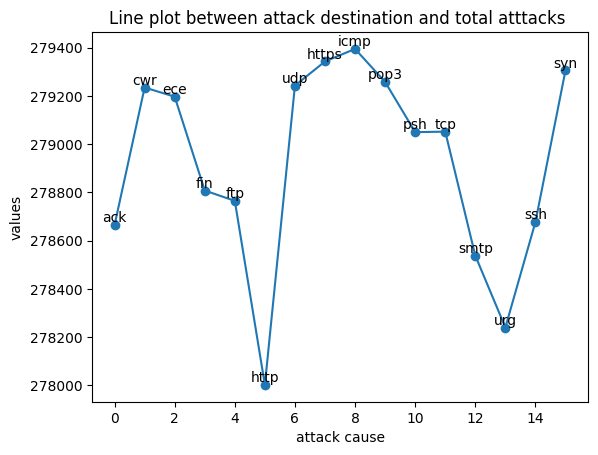

In [41]:
# Create a line plot
plt.plot(malware_cause, marker='o')

# Add custom labels to each point
for i, label in enumerate(attack_cause):
    plt.text(i, malware_cause[i] + 0.1, label, ha='center', va='bottom')

# Set y-axis limits (optional)
#plt.ylim(0, max(values) + 1)

# Add title and labels
plt.title('Line plot between attack destination and total atttacks ')
plt.xlabel('attack cause')
plt.ylabel('values')

# Show the plot
plt.show()


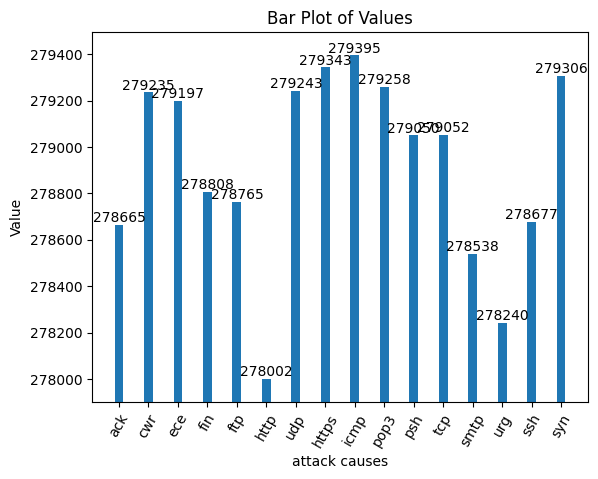

In [42]:
positions = np.arange(len(malware_cause)) * 2
bars = plt.bar(positions, malware_cause , width= 0.6)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

# Set y-axis limits (optional)
plt.ylim(min(malware_cause) - 100, max(malware_cause) + 100)

#Set x-axis labels
plt.xticks(positions, attack_cause , rotation = 60)
# Add title and labels
plt.title('Bar Plot of Values')
plt.xlabel('attack causes')
plt.ylabel('Value')

# Show the plot
plt.show()

MAX ATTACKS WERE CAUSED DUE TO : 

1. ICMP : 
2. HTTPS : SHARING DATA BETWEEN INTERNET BROWSER AND WEBSITE
3. SYN

In [43]:
variables  = [ 'ack' , 'cwr' , 'ece' , 'fin' , 'ftp' , 'http' , 'udp' , 'https' , 'icmp' , 'pop3' , 'psh' , 'tcp' , 'smtp' , 'urg' , 'ssh' , 'syn']
print(variables)
X = df[variables]
X_new = test_df[variables]
X = X.replace({'t': 1, 'f': 0})
X_new = X_new.replace({'t': 1, 'f': 0})
print(X_new)


['ack', 'cwr', 'ece', 'fin', 'ftp', 'http', 'udp', 'https', 'icmp', 'pop3', 'psh', 'tcp', 'smtp', 'urg', 'ssh', 'syn']
        ack  cwr  ece  fin  ftp  http  udp  https  icmp  pop3  psh  tcp  smtp  \
0         0    1    0    1    0     1    1      0     0     1    1    1     0   
1         0    0    0    0    1     1    0      1     0     1    0    0     1   
2         0    0    1    0    0     0    1      1     0     1    0    1     1   
3         0    1    1    0    0     1    0      1     0     1    0    1     0   
4         0    0    1    0    0     0    1      1     0     1    0    0     1   
...     ...  ...  ...  ...  ...   ...  ...    ...   ...   ...  ...  ...   ...   
239995    1    1    0    0    1     1    0      0     0     1    1    0     1   
239996    1    0    0    0    0     1    1      0     0     1    1    0     0   
239997    1    0    1    0    0     1    0      1     1     0    0    0     0   
239998    1    1    0    1    0     0    0      0     1     0    1    0

In [44]:

y = df['attack_type']
y.unique()

array(['Mirai', 'Recon', 'Phishing', 'DDoS', 'DoS'], dtype=object)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
DTR_model = DecisionTreeRegressor(random_state=1)

# Fit the model
#DTR_model.fit(X,y)
#predictions = DTR_model.predict(X.head())

from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the string target values to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# Initialize and train the model
DTR_model.fit(X,y_train_encoded)
# Predict numerical values
predictions_encoded = DTR_model.predict(X)

# Since predictions may not be exact integers, we need to round them to the nearest integer
predictions_encoded = np.round(predictions_encoded).astype(int)

# Decode numerical predictions back to string values
predictions_str = label_encoder.inverse_transform(predictions_encoded)

print(predictions_str)


accuracy = accuracy_score(y, predictions_str)
print("Predicted values:", predictions_str)
print("Accuracy:", accuracy)

['Mirai' 'Mirai' 'Phishing' ... 'Phishing' 'Mirai' 'Phishing']
Predicted values: ['Mirai' 'Mirai' 'Phishing' ... 'Phishing' 'Mirai' 'Phishing']
Accuracy: 0.22575697303961095


In [51]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
LR_model = LinearRegression()

# Encode the string target values to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# Initialize and train the model
LR_model.fit(X,y_train_encoded)
# Predict numerical values
predictions_encoded = LR_model.predict(X_new)

# Since predictions may not be exact integers, we need to round them to the nearest integer
predictions_encoded = np.round(predictions_encoded).astype(int)

# Decode numerical predictions back to string values
predictions_str = label_encoder.inverse_transform(predictions_encoded)

print(predictions_str)

'''accuracy = accuracy_score(y.head(), predictions_str)
print("Predicted values:", predictions_str)
print("Accuracy:", accuracy)'''

['Mirai' 'Mirai' 'Mirai' ... 'Mirai' 'Mirai' 'Mirai']


'accuracy = accuracy_score(y.head(), predictions_str)\nprint("Predicted values:", predictions_str)\nprint("Accuracy:", accuracy)'

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
RFR_model = RandomForestRegressor(n_estimators=100)

# Encode the string target values to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# Initialize and train the model
RFR_model.fit(X,y_train_encoded)
# Predict numerical values
predictions_encoded = RFR_model.predict(X_new)

# Since predictions may not be exact integers, we need to round them to the nearest integer
predictions_encoded = np.round(predictions_encoded).astype(int)

# Decode numerical predictions back to string values
predictions_str = label_encoder.inverse_transform(predictions_encoded)

print(predictions_str)

predictions_str.shape
# Example data
data = {
    'src_ipv6' : test_df['src_ipv6'],
    'attack type': predictions_str
    #'City': ['New York', 'Paris', 'Berlin', 'London']
}

# Create a DataFrame
dataframe= pd.DataFrame(data)

# Save the DataFrame to an Excel file
dataframe.to_excel('output.xlsx', index=False)

print("DataFrame has been saved to 'output.xlsx'")



['DoS' 'Mirai' 'DoS' ... 'Mirai' 'Phishing' 'Mirai']
DataFrame has been saved to 'output.xlsx'


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
GBR_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Encode the string target values to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# Initialize and train the model
GBR_model.fit(X,y_train_encoded)
# Predict numerical values
predictions_encoded = GBR_model.predict(X_new)

# Since predictions may not be exact integers, we need to round them to the nearest integer
predictions_encoded = np.round(predictions_encoded).astype(int)

# Decode numerical predictions back to string values
predictions_str = label_encoder.inverse_transform(predictions_encoded)

print(predictions_str)

accuracy = accuracy_score(y, predictions_str)
print("Predicted values:", predictions_str)
print("Accuracy:", accuracy)


['Mirai' 'Mirai' 'Mirai' ... 'Mirai' 'Mirai' 'Mirai']
Predicted values: ['Mirai' 'Mirai' 'Mirai' ... 'Mirai' 'Mirai' 'Mirai']
Accuracy: 0.19945240629446062
